In [66]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [68]:
all_sst_df = pd.DataFrame()
for filename in os.listdir('../data_new/sst/'):
    print(filename)
    ds = xr.open_dataset('../data_new/sst/'+filename)
    date = ds.attrs['time_coverage_end'].split('T')[0]
    sst = ds['sst'].to_pandas()
    df = sst.stack().reset_index()
    df.columns = ['lat', 'lon', 'sst']
    df_filtered = df.loc[((df['lat'] < 48.99994719280332) & (df['lat'] > 41.382130631893006)) & ((df['lon'] < -76.05991342937092) & (df['lon'] > -92.25080118212954))].copy()
    df_filtered['date'] = date
    all_sst_df = all_sst_df.append(df_filtered)
all_sst_df

AQUA_MODIS.20190101_20190108.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190109_20190116.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190117_20190124.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190125_20190201.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190202_20190209.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190210_20190217.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190218_20190225.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190226_20190305.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190306_20190313.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190314_20190321.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190322_20190329.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190330_20190406.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190407_20190414.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190415_20190422.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190423_20190430.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190501_20190508.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190509_20190516.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190517_20190524.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190525_20190601.L3m.8D.SST.sst.4km.nc
AQUA_MODIS.20190602_20190609.L3

,lat,lon,sst,date
737133,48.770832,-87.187500,2.470000,2019-01-09
737134,48.770832,-87.145828,2.470000,2019-01-09
737135,48.770832,-87.104164,2.480000,2019-01-09
737136,48.770832,-87.062500,2.395000,2019-01-09
737137,48.770832,-87.020828,2.235000,2019-01-09
...,...,...,...,...
3873271,41.437500,-82.437500,25.855000,2020-08-16
3873272,41.437500,-82.395828,25.844999,2020-08-16
3873273,41.437500,-82.354164,24.150000,2020-08-16
3877444,41.395832,-82.520828,25.260000,2020-08-16


In [69]:
all_sst_df.to_csv('../data_new/sst_20192020.csv', index = False)

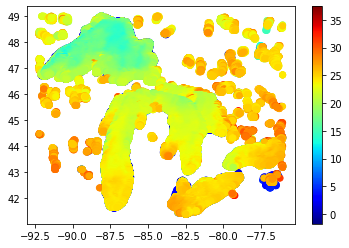

In [33]:
plt.scatter(all_sst_df['lon'], all_sst_df['lat'], c = all_sst_df['sst'], cmap = 'jet')
plt.colorbar()
plt.show()

In [34]:
chlor_df = pd.read_csv('../data_new/chlor_clipped.csv')

In [35]:
sst_df = pd.read_csv('../data_new/sst_clipped.csv')

In [36]:
chlor_df

,lat,lon,chlor_a,date
0,47.187500,-91.104164,1.308155,2020-01-09
1,47.187500,-91.062500,1.307535,2020-01-09
2,47.187500,-91.020828,1.263047,2020-01-09
3,47.187500,-90.979164,1.263047,2020-01-09
4,47.145832,-91.104164,1.085385,2020-01-09
...,...,...,...,...
327396,41.520832,-82.437500,42.574493,2020-08-16
327397,41.520832,-82.395828,37.461773,2020-08-16
327398,41.520832,-82.354164,35.983860,2020-08-16
327399,41.479164,-82.437500,88.074480,2020-08-16


In [39]:
for unique in chlor_df['date'].unique():
    date_df = chlor_df.loc[chlor_df['date'] == unique]
    

            lat        lon   chlor_a        date
0     47.187500 -91.104164  1.308155  2020-01-09
1     47.187500 -91.062500  1.307535  2020-01-09
2     47.187500 -91.020828  1.263047  2020-01-09
3     47.187500 -90.979164  1.263047  2020-01-09
4     47.145832 -91.104164  1.085385  2020-01-09
...         ...        ...       ...         ...
5108  41.437500 -82.354164  5.723032  2020-01-09
5109  41.437500 -82.312500  5.634328  2020-01-09
5110  41.437500 -82.270828  5.436780  2020-01-09
5111  41.395832 -82.520828  7.485239  2020-01-09
5112  41.395832 -82.479164  7.485239  2020-01-09

[5113 rows x 4 columns]
            lat        lon   chlor_a        date
5113  47.937500 -86.437500  0.632666  2020-01-17
5114  47.937500 -86.395828  0.638470  2020-01-17
5115  47.937500 -86.354164  0.644120  2020-01-17
5116  47.937500 -86.312500  0.644120  2020-01-17
5117  47.895832 -86.395828  0.631902  2020-01-17
...         ...        ...       ...         ...
7401  41.479164 -82.354164  2.467724  2020-0

              lat        lon    chlor_a        date
213983  48.895832 -87.979164  40.371307  2020-06-25
213984  48.895832 -87.937500  75.511080  2020-06-25
213985  48.895832 -87.895828  75.511080  2020-06-25
213986  48.854164 -88.104164  15.269809  2020-06-25
213987  48.854164 -88.062500  15.269810  2020-06-25
...           ...        ...        ...         ...
228276  41.437500 -82.437500   3.499837  2020-06-25
228277  41.437500 -82.395828   3.527809  2020-06-25
228278  41.437500 -82.354164   3.511013  2020-06-25
228279  41.437500 -82.312500   3.242846  2020-06-25
228280  41.437500 -82.270828   3.242846  2020-06-25

[14298 rows x 4 columns]
              lat        lon    chlor_a        date
228281  48.895832 -88.104164   9.013842  2020-07-03
228282  48.895832 -88.062500   9.013843  2020-07-03
228283  48.895832 -87.979164  20.432785  2020-07-03
228284  48.895832 -87.937500  20.592580  2020-07-03
228285  48.895832 -87.895828  33.641346  2020-07-03
...           ...        ...        ..

In [37]:
sst_df

,lat,lon,sst,date
0,48.854164,-87.729164,1.275,2020-01-09
1,48.854164,-87.687500,1.275,2020-01-09
2,48.812500,-87.437500,1.885,2020-01-09
3,48.770832,-87.062500,2.450,2020-01-09
4,48.770832,-87.020828,2.455,2020-01-09
...,...,...,...,...
388272,41.437500,-82.437500,25.855,2020-08-16
388273,41.437500,-82.395828,25.845,2020-08-16
388274,41.437500,-82.354164,24.150,2020-08-16
388275,41.395832,-82.520828,25.260,2020-08-16


In [48]:
chlor_df

,lat,lon,chlor_a,date
0,47.187500,-91.104164,1.308155,2020-01-09
1,47.187500,-91.062500,1.307535,2020-01-09
2,47.187500,-91.020828,1.263047,2020-01-09
3,47.187500,-90.979164,1.263047,2020-01-09
4,47.145832,-91.104164,1.085385,2020-01-09
...,...,...,...,...
327396,41.520832,-82.437500,42.574493,2020-08-16
327397,41.520832,-82.395828,37.461773,2020-08-16
327398,41.520832,-82.354164,35.983860,2020-08-16
327399,41.479164,-82.437500,88.074480,2020-08-16


In [76]:
lake = 'michigan'
lowres_path = '../20192020/'
for filename in os.listdir(lowres_path):
    if lake in filename:
        chlor = pd.read_csv(lowres_path + lake+'_chlor.csv')
        sst = pd.read_csv(lowres_path+lake+'_sst.csv')
        lake_df = pd.DataFrame(columns = ['date', 'chlor', 'sst'])
        for date in chlor['date'].unique():
            chlor_date_df = chlor.loc[chlor['date'] == date]
            chlor_val = chlor_date_df['chlor_a'].mean()
            sst_date_df = sst.loc[sst['date'] == date]
            sst_val = sst_date_df['sst'].mean()
            lake_df = lake_df.append(pd.DataFrame(data = {'date': [date], 'chlor': [chlor_val], 'sst': [sst_val]}), ignore_index = True)
        lake_df.to_csv('../final/'+lake+'.csv', index = False)